In [2]:
import math
from math import cos, sin, log, log10, pi
from decimal import Decimal as D
import numpy as np
from matplotlib import pyplot as plt
pi, math.e

(3.141592653589793, 2.718281828459045)

In [34]:
# setting
mass = 1.0   
T_max = 10.0    # final time
dt = 0.001        # time step
k = 1.0          # force constant

In [12]:
def const_force(x):
    return 1.0

In [9]:
# Harmonic oscillation
def force(x):
    return -x

### Morse Potential
Morse potential is given as below to serve as approximation for the potential engery.\
$V(r)=D_e(1-e^{-a(r-r_e)})^2,$\
where $D_e=100,$ $a=1,$ and $r_e=1$ in our experiment.\
The force due to Morse potential is $f(r)=-\frac{dV(r)}{dr},$ which is as below\
$f(r)=-2aD_ee^{-a(r-r_e)}(1-e^{-a(r-r_e)}).$\
Energy under Morse Potential\
$E=D_e(1-e^{-a(r-r_e)})^2+\frac{1}{2}mv^2$

In [91]:
# Morse potential
def morse_potential(x, a=1, De=100, re=1):
    g = math.e**(-a * (x - re))
    return De * (1 - g)**2

In [90]:
# force of Morse potential
def morse_force(x, a=1, De=100, re=1):
    g = math.e**(-a * (x - re))
    f = -2 * a * De * g * (1 - g)
    return f

In [89]:
def total_energy_with_morse_potential(x, v, m=1, a=1, De=100, re=1):
    En = morse_potential(x) + 0.5 * m * (v**2)
    return En

In [40]:
def varlet_velocity(t=0.0, x=1.0, v=0.0, dt=0.001, t_final=T_max, force=force):
    # Must ensure it can run single step calculation.
    # That is, when t = t_0, t_final = t_0 + dt, the result must be correct.
    
    x_lst = []
    v_lst = []
    x_lst.append(x)
    v_lst.append(v)
    
    time = D(str(t))
    t_final = D(str(t_final))
    dt_t = D(str(dt))
    
    # Warning 1: never use np.arange to iterate over float steps
    # because sometimes it will abnormaly include stop condition,
    # which is the result that we do not want it happen.
    #
    # Warning 2: even if you add step size to time iteratively,
    # there is still an inherent error, i.e. floating-point approximation
    # error, which is due to the non-exact representation from
    # the binary floating point standard(IEEE-754). The workaround
    # is to use the decimal.Decimal(str(float_number)) in iteration.
    
    while (time < t_final):
        time += dt_t
        f = force(x)
        v = v + f/(2 * mass) * dt
        x = x + v * dt
        f = force(x)
        v = v + f/(2 * mass) * dt
#         print(dt, x, v)
        x_lst.append(x)
        v_lst.append(v)
    return x_lst, v_lst

In [92]:
x_lst, v_lst = varlet_velocity(dt=dt, x=2, force=morse_force)
len(x_lst)

10001

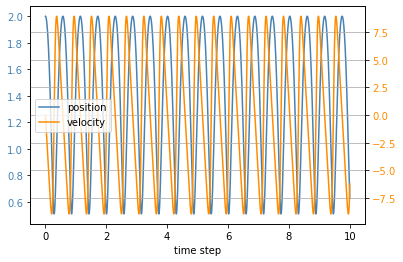

In [93]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('time step')
# ax1.set_ylabel('position', color='b')
pos, = ax1.plot(np.arange(0.0, T_max, dt), x_lst[:-1], label='position', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
vel, = ax2.plot(np.arange(0.0, T_max, dt), v_lst[:-1], label='velocity', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
plt.legend(handles=[pos, vel])
plt.grid(axis='both')
plt.savefig('xv.png')
plt.show()

### Total Energy

In [142]:
def total_energy(t=0.0, x=2.0, v=0.0, dt=0.001, t_final=T_max):    
    e_lst = []
    
    engy = total_energy_with_morse_potential(x, v)
    e_lst.append(engy)
    
    time = D(str(t))
    t_final = D(str(t_final))
    dt_t = D(str(dt))
    
    while (time < t_final):
        x_lst, v_lst = varlet_velocity(t=time, x=x, v=v,\
                                       dt=dt, t_final=time+dt_t,\
                                       force=morse_force)
        x, v = x_lst[-1], v_lst[-1]
        engy = total_energy_with_morse_potential(x, v)
        e_lst.append(engy)
        time += dt_t
    return e_lst    

In [130]:
e_lst = total_energy()
len(e_lst)

10001

In [151]:
sum(e_lst)/len(e_lst)

39.95728886864427

In [143]:
e_lst_2 = total_energy(dt=0.0001)
len(e_lst_2)

100001

In [152]:
sum(e_lst_2)/len(e_lst_2)

39.95763657726583

### Plot Total Energy

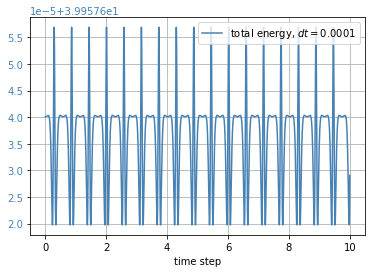

In [148]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('time step')
# ax1.set_ylabel('total energy', color='b')
egy, = ax1.plot(np.arange(0.0, T_max, 0.0001), e_lst_2[:-1], label='total energy, $dt=0.0001$', color='steelblue')
# egy, = ax1.plot(np.arange(0.0, T_max, dt), e_lst[:-1], label='total energy, $dt=0.001$', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

plt.legend(handles=[egy])
plt.grid(axis='both')
plt.savefig('total_energy_dt_1e-4.png')
plt.show()

In [48]:
# Define the range of decimal place
decimal_place = [-1, -8]

### Check Energy Difference $\Delta E$ Under Morse Potential with Different $dt$

#### One Step Delta Energy $\Delta E$

In [138]:
def compute_one_step_delta_energy(x=2, v=0, init_time=0.0):
    exponent = list(range(decimal_place[0], decimal_place[1], -1))
    delta_energy = []
    for _ in exponent:
        dt = 10**(_)
        E_0 = morse_energy(x, v)    # initial energy
        
        x_l, v_l = varlet_velocity(t=init_time, x=x, v=v,\
                                  dt=dt, t_final=init_time+dt,\
                                  force=morse_force)
        x, v = x_l[-1], v_l[-1]
        
        print(dt, x, v)
        E_1 = morse_energy(x, v)
        delta_E = abs((E_1 - E_0) / E_0)
        delta_energy.append(delta_E)
    return delta_energy

In [139]:
delta_energy = compute_one_step_delta_energy()
delta_energy

0.1 1.7674558420651703 -4.812619842040926
0.01 1.7168424653820684 -5.311200582196682
0.001 1.7115062785084831 -5.3611786002309
0.0001 1.7109699107311935 -5.3661769927786125
1e-05 1.7109162464620458 -5.366676837220173
1e-06 1.7109108797602164 -5.3667268217154644
1e-07 1.7109103430872843 -5.366731820165504


[0.008308236206145573,
 1.601866800891641e-05,
 2.6122951594770627e-08,
 2.72919573731522e-11,
 2.7865132569148525e-14,
 3.5272319707783927e-16,
 3.527231970778391e-16]

#### Plot One Step Delta Energy $\Delta E$ with Different $dt$

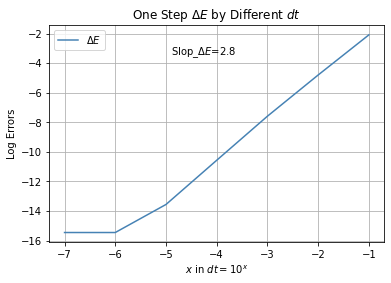

In [140]:
new_e = list(range(decimal_place[0], decimal_place[1], -1))[::-1]
new_delta_energy = [log10(_) for _ in delta_energy][::-1]
delta_engy, = plt.plot(new_e, new_delta_energy, color='steelblue', label=r'$\Delta E$')

x_big = -1
x_small = -4
slop_delta_engy = (new_delta_energy[x_big] - new_delta_energy[x_small])/(x_big - x_small)

plt.legend(handles=[delta_engy])
text_x = min(new_e) + (max(new_e) - min(new_e)) * 0.35
text_y_1 = (max(new_delta_energy) - min(new_delta_energy)) * 0.90 + min(new_delta_energy)
plt.text(text_x, text_y_1, r'Slop_$\Delta E$=%1.1f'%slop_delta_engy)
plt.title(r'One Step $\Delta E$ by Different $dt$')
plt.xlabel(r'$x$ in $dt=10^{x}$')
plt.ylabel('Log Errors')
plt.grid()
plt.savefig('delta_energy.png')
plt.show()
plt.close()

#### Multi Step Delta Energy $\Delta E$

In [74]:
def compute_multi_step_delta_energy(x=2, v=0, init_time=0.0, t_final=T_max):
    exponent = list(range(decimal_place[0], decimal_place[1], -1))
    delta_energy = []
    for _ in exponent:
        dt = 10**(_)
        E_0 = morse_energy(x, v)    # initial energy
        
        x_l, v_l = varlet_velocity(t=init_time, x=x, v=v,\
                                  dt=dt, t_final=t_final,\
                                  force=morse_force)
        x, v = x_l[-1], v_l[-1]
        
        print(dt, x, v)
        E_1 = morse_energy(x, v)
        delta_E = abs((E_1 - E_0) / E_0)
        delta_energy.append(delta_E)
    return delta_energy

In [78]:
mul_delta_e = compute_multi_step_delta_energy(t_final=2)
mul_delta_e

0.1 69.07988251671753 40.45475813248164
0.01 149.98939878168082 40.45475813248164
0.001 230.89891504664772 40.45475813248164
0.0001 311.8084313117851 40.45475813248164
1e-05 392.7179475712382 40.45475813248164
1e-06 473.62746378521655 40.45475813248164
1e-07 554.5369804831997 40.45475813248164


[21.981680743028306, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

#### Plot Multi Step Delta Energy $\Delta E$ with Different $dt$

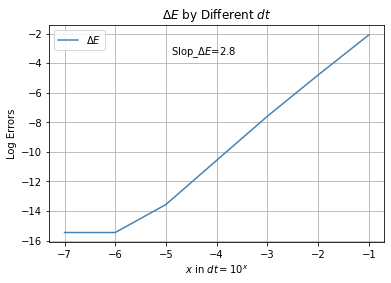

In [68]:
new_e = list(range(decimal_place[0], decimal_place[1], -1))[::-1]
new_delta_energy = [log10(_) for _ in mul_delta_e][::-1]
delta_engy, = plt.plot(new_e, new_delta_energy, color='steelblue', label=r'$\Delta E$')

x_big = -1
x_small = -4
slop_delta_engy = (new_delta_energy[x_big] - new_delta_energy[x_small])/(x_big - x_small)

plt.legend(handles=[delta_engy])
text_x = min(new_e) + (max(new_e) - min(new_e)) * 0.35
text_y_1 = (max(new_delta_energy) - min(new_delta_energy)) * 0.90 + min(new_delta_energy)
plt.text(text_x, text_y_1, r'Slop_$\Delta E$=%1.1f'%slop_delta_engy)
plt.title(r'Multi Step $\Delta E$ by Different $dt$')
plt.xlabel(r'$x$ in $dt=10^{x}$')
plt.ylabel('Log Errors')
plt.grid()
plt.savefig('mul_delta_energy.png')
plt.show()
plt.close()